In [1]:
from macrosim.SeriesAccessor import SeriesAccessor
from macrosim.GrowthDetector import GrowthDetector
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY'
)

start = dt.datetime.fromisoformat("2000-01-01")
end = dt.datetime.fromisoformat("2024-01-01")

df = fred.get_series(
    series_ids=['NETEXP', 'CIVPART', 'LES1252881600Q', 'SPPOPGROWUSA', 'CORESTICKM159SFRBATL', 'GDPC1'],
    date_range=(start, end), reindex_freq='QS', series_alias=['NETEXP', 'CIVPART', 'RWAGE', 'POPGROWTH', 'CPI', 'RGDP'])

df = fred.fill(
    df,
    [*[None] * 3, 'ffill']
)
df

,NETEXP,CIVPART,RWAGE,POPGROWTH,CPI,RGDP
2000-01-01,-356.583,67.3,334.0,1.112769,2.335519,13878.147
2000-04-01,-362.501,67.3,334.0,1.112769,2.409239,14130.908
2000-07-01,-393.867,66.9,335.0,1.112769,2.712970,14145.312
2000-10-01,-411.343,66.8,334.0,1.112769,2.919941,14229.765
2001-01-01,-402.653,67.2,333.0,0.989741,2.878468,14183.120
...,...,...,...,...,...,...
2023-01-01,-813.648,62.4,364.0,0.491925,6.488339,22403.435
2023-04-01,-803.479,62.6,365.0,0.491925,6.267738,22539.418
2023-07-01,-781.091,62.6,366.0,0.491925,5.402919,22780.933
2023-10-01,-791.152,62.7,370.0,0.491925,4.882717,22960.600


In [3]:
gpd = GrowthDetector()
opt = gpd.find_opt_growth(df)
opt

{'NETEXP': (Logarithmic(x, 766.31, 0.0, 1.0, 222.54), MSE = 18879.16),
 'CIVPART': (Linear(x, -0.06), MSE = 0.35),
 'RWAGE': (Exponential(x, 1.03, -11.42), MSE = 48.33),
 'POPGROWTH': (Linear(x, -0.01), MSE = 0.02),
 'CPI': (Exponential(x, 1.09, -0.21), MSE = 0.60),
 'RGDP': (Exponential(x, 1.01, -12.18), MSE = 156831.00)}

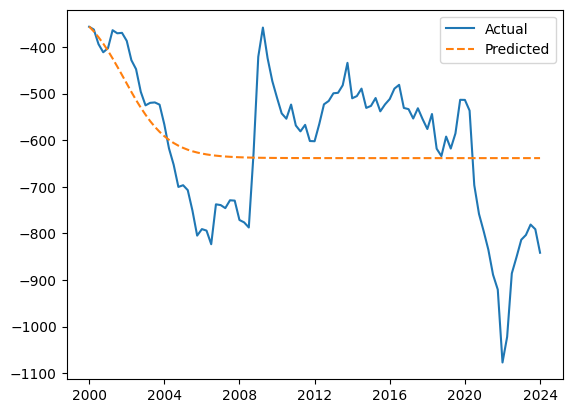

In [4]:
func = opt['NETEXP'][0]

y_true = df['NETEXP']
y_pred = [-356]
for _ in range(len(y_true)):
    y_pred.append(func(y_pred[-1]))

y_pred = pd.Series(y_pred).iloc[:-1]
y_pred.index = y_true.index

plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.legend()


In [5]:
gpd.sympy_visualize['NETEXP']

7.7e+2*log(0.00325132460987521*Abs(x)**0.99999999 + 1)*sign(x) + 2.2e+2